In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Define the path to your zip file
zip_file_path = '/content/drive/My Drive/freshRotten.zip'

zip_object = zipfile.ZipFile(file=zip_file_path, mode='r')
extracted_folder_path = zip_object.extractall('./')
zip_object.close()

# List the extracted files
extracted_files = os.listdir(extracted_folder_path)
print("Files extracted successfully:", extracted_files)

Files extracted successfully: ['.config', 'freshRotten', 'drive', 'sample_data']


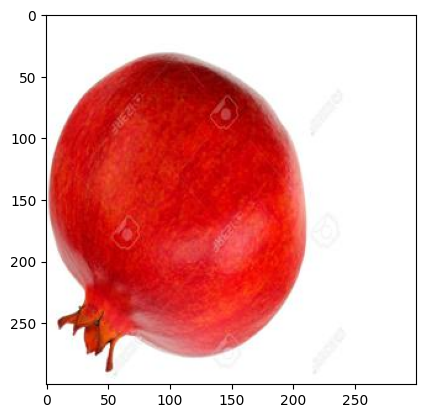

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img=mpimg.imread('/content/freshRotten/train/fresh_pomegranates_done/fresh_pomegranate_100.jpg')

plt.imshow(img)


In [ ]:
import numpy as np
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16

# Load the pre-trained VGG16 model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


# Freeze the pre-trained model layers
for layer in vgg16_model.layers:
    layer.trainable = False
# Step 1: Prepare the Dataset (assuming images are organized in folders)
train_data_dir = '/content/freshRotten/train'  # Path to the training dataset
test_data_dir  = '/content/freshRotten/test'   # Path to the testing dataset

img_width, img_height = 224, 224  # VGG16 input dimensions




58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Step 3: Prepare the Model for Fine-tuning
model = Sequential([
    vgg16_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(6, activation='softmax')
])



In [ ]:
# Step 4: Train the Model
train_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')

test_datagen= ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width,img_height),
    batch_size=5,
    class_mode='categorical'
)




Found 1547 images belonging to 6 classes.
Found 108 images belonging to 6 classes.


In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.fit(train_generator,
          epochs=50,
          steps_per_epoch= train_generator.samples//32,
          validation_data = test_generator,
          validation_steps=test_generator.samples//5
          )

Epoch 1/50
48/48 [==============================] - 22s 248ms/step - loss: 0.9456 - accuracy: 0.6416 - val_loss: 0.7209 - val_accuracy: 0.7143
Epoch 2/50
48/48 [==============================] - 8s 156ms/step - loss: 0.3631 - accuracy: 0.8818 - val_loss: 0.6130 - val_accuracy: 0.7619
Epoch 3/50
48/48 [==============================] - 8s 156ms/step - loss: 0.2121 - accuracy: 0.9432 - val_loss: 0.4863 - val_accuracy: 0.8095
Epoch 4/50
48/48 [==============================] - 7s 146ms/step - loss: 0.1384 - accuracy: 0.9743 - val_loss: 0.6618 - val_accuracy: 0.7619
Epoch 5/50
48/48 [==============================] - 7s 150ms/step - loss: 0.1000 - accuracy: 0.9828 - val_loss: 0.5181 - val_accuracy: 0.8095
Epoch 6/50
48/48 [==============================] - 8s 163ms/step - loss: 0.0711 - accuracy: 0.9908 - val_loss: 0.4871 - val_accuracy: 0.8095
Epoch 7/50
48/48 [==============================] - 8s 155ms/step - loss: 0.0515 - accuracy: 0.9967 - val_loss: 0.5259 - val_accuracy: 0.8000
Epoch

In [ ]:
y_pred = model.predict(test_generator)
pred = np.argmax(y_pred,axis=1)
y_true = test_generator.classes

22/22 [==============================] - 2s 109ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_generator.classes, pred)

0.18518518518518517

In [ ]:
pred

array([4, 1, 2, 1, 2, 1, 0, 0, 2, 4, 3, 2, 1, 4, 3, 3, 3, 4, 4, 5, 1, 4,
       5, 2, 1, 0, 5, 0, 3, 0, 3, 0, 4, 3, 5, 1, 2, 3, 0, 3, 0, 5, 2, 0,
       5, 2, 2, 2, 1, 5, 3, 2, 4, 0, 3, 0, 5, 5, 5, 5, 2, 3, 1, 0, 3, 5,
       1, 3, 3, 0, 3, 2, 3, 2, 4, 5, 5, 3, 2, 2, 0, 2, 3, 1, 2, 4, 5, 5,
       3, 3, 3, 1, 4, 1, 4, 0, 5, 3, 5, 0, 5, 0, 4, 2, 3, 2, 1, 1])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               12845568  
                                                                 
 dense_3 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 27563334 (105.15 MB)
Trainable params: 12848646 (49.01 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
data.class_indices

NameError: name 'data' is not defined

In [ ]:
from tensorflow.keras.preprocessing import image

class_labels = ['fresh peach', 'fresh pomegranate','fresh strawberries','rotten peach', 'rotten pomegranate','rotten strawberries']  # List of class labels in the same order as the model output
# Step 5: Prediction
def predict_vegetable(image_path):
    img = image.load_img(image_path, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Rescale pixel values
    predictions = model.predict(x)
    print(predictions)
    predicted_class_index = np.argmax(predictions)
    print(predicted_class_index)
    predicted_class = class_labels[predicted_class_index]
    if(predictions[0][predicted_class_index ]>0.5):# Assuming you have a list of class labels
      print("Predicted vegetable:", predicted_class)
    else:
      print("unknown")

# Example usage:
image_path = '/content/rstraw.jpeg'
predicted_vegetable = predict_vegetable(image_path)


1/1 [==============================] - 0s 57ms/step
[[4.20170398e-10 6.84233226e-10 1.15626635e-05 4.17364268e-11
  1.94422825e-08 9.99988437e-01]]
5
Predicted vegetable: rotten strawberries


Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.11      0.11        18
           1       0.20      0.17      0.18        18
           2       0.30      0.33      0.32        18
           3       0.25      0.33      0.29        18
           4       0.15      0.11      0.13        18
           5       0.16      0.17      0.16        18

    accuracy                           0.20       108
   macro avg       0.20      0.20      0.20       108
weighted avg       0.20      0.20      0.20       108



<Axes: >

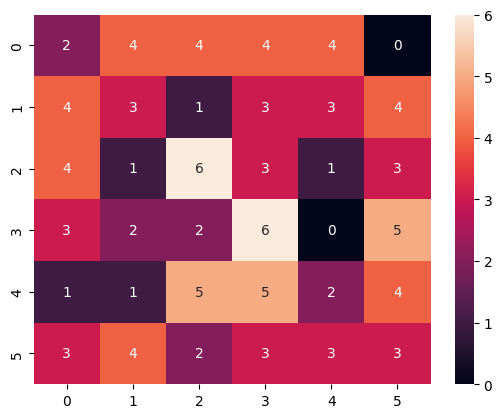

In [ ]:
from sklearn.metrics import classification_report as cr , confusion_matrix as cm
import matplotlib.pyplot as plt
import seaborn as sns


report=cr(y_true,pred)
print("Classification Report:")
print(report)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_generator.classes, pred)
sns.heatmap(cm, annot=True)